# **Imports and Load Dependences**


In [1]:
!pip install unidecode

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 1.9 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Function to remove special characters
from unidecode import unidecode

my_palette = sns.diverging_palette(230, 20, as_cmap=False)
sns.set_theme(style="ticks", palette=my_palette)

# **Load Datasets**

In [24]:
#@title Download Datasets from GDrive

# ESC FREQ 1
!gdown 1IpQuBoxR79tHk8IIAZzwFWtUjzSLr6uZ

!gdown 1hkzJTRxUQKvyqrw30rIpmrA1ZoiVd1oJ

Downloading...
From: https://drive.google.com/uc?id=1IpQuBoxR79tHk8IIAZzwFWtUjzSLr6uZ
To: /content/RAIS_ESC_FREQ.csv
100% 315k/315k [00:00<00:00, 107MB/s]
Downloading...
From: https://drive.google.com/uc?id=1hkzJTRxUQKvyqrw30rIpmrA1ZoiVd1oJ
To: /content/results_scrapper_PCDII.csv
100% 698k/698k [00:00<00:00, 112MB/s]


In [25]:
df = pd.read_csv('RAIS_ESC_FREQ.csv', encoding='ISO-8859-1', sep=';')
cities_df = pd.read_csv('results_scrapper_PCDII.csv', index_col=0)

# **Pre-Processing**

## **ESC FREQ**

In [26]:
#@title Show attributes types and evaluate the existence of NaN values in each feature
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5570 entries, 0 to 5569
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Município               5570 non-null   object
 1   Analfabeto              5570 non-null   int64 
 2   Até 5 Incompleto        5570 non-null   int64 
 3   5 Completo Fundamental  5570 non-null   int64 
 4   6 a 9 Fundamental       5570 non-null   int64 
 5   Fundamental Completo    5570 non-null   int64 
 6   Médio Incompleto        5570 non-null   int64 
 7   Médio Completo          5570 non-null   int64 
 8   Superior Incompleto     5570 non-null   int64 
 9   Superior Completo       5570 non-null   int64 
 10  Mestrado                5570 non-null   int64 
 11  Doutorado               5570 non-null   int64 
 12  Total                   5570 non-null   int64 
dtypes: int64(12), object(1)
memory usage: 565.8+ KB


In [27]:
#@title Describe dataset with summary measures
#@markdown The idea is to evaluate the existence of different scales beetwen the features
#@markdown - Presence of outliers or influence of larger cities?
df.describe()

,Analfabeto,Até 5 Incompleto,5 Completo Fundamental,6 a 9 Fundamental,Fundamental Completo,Médio Incompleto,Médio Completo,Superior Incompleto,Superior Completo,Mestrado,Doutorado,Total
count,5570.000000,5570.000000,5570.000000,5570.000000,5570.000000,5570.000000,5.570000e+03,5570.000000,5.570000e+03,5570.000000,5570.000000,5.570000e+03
mean,33.735368,186.564632,159.642011,371.358887,659.573250,528.114542,5.030234e+03,393.557630,2.004461e+03,73.460323,36.656553,9.477368e+03
std,204.527925,1120.172770,1040.744498,2513.741071,5314.783667,3866.283919,4.350722e+04,4601.771841,2.672484e+04,908.239645,444.490866,8.946540e+04
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000e+00,0.000000,1.000000e+00,0.000000,0.000000,2.000000e+01
25%,2.000000,16.000000,14.000000,26.000000,46.000000,27.000000,2.820000e+02,12.000000,1.200000e+02,0.000000,0.000000,6.030000e+02
50%,6.000000,43.000000,38.000000,67.000000,110.000000,75.000000,6.685000e+02,31.000000,2.440000e+02,1.000000,0.000000,1.334000e+03
75%,20.000000,131.000000,112.000000,221.750000,336.000000,267.750000,1.927750e+03,103.000000,6.010000e+02,6.000000,1.000000,3.769750e+03
max,12327.000000,55847.000000,58675.000000,142530.000000,301506.000000,226011.000000,2.567290e+06,279764.000000,1.691331e+06,40875.000000,20490.000000,5.390446e+06


In [28]:
#@title View dataset struct
df.head()

,Município,Analfabeto,Até 5 Incompleto,5 Completo Fundamental,6 a 9 Fundamental,Fundamental Completo,Médio Incompleto,Médio Completo,Superior Incompleto,Superior Completo,Mestrado,Doutorado,Total
0,RO-ALTA FLORESTA D OESTE,10,133,103,129,156,183,1711,118,704,4,0,3251
1,RO-ARIQUEMES,83,441,347,767,795,1587,13397,798,3024,91,16,21346
2,RO-CABIXI,3,9,45,46,56,48,503,18,159,0,1,888
3,RO-CACOAL,50,501,282,681,1091,1367,11631,1088,3064,127,23,19905
4,RO-CEREJEIRAS,6,73,100,153,170,218,1627,106,455,27,0,2935


In [29]:
#@title Rename dataset keys
#@markdown Remove special characters from the features names

df = df.rename(columns={key: unidecode(key).replace(' ', '_') for key in df.keys()})

In [30]:
#@title Get state and city in dataframe
#@markdown Separate State and City from the Municipio attribute

def format_city(city: str):

  city_without_special_charac = unidecode(city)

  city_capitalize = city_without_special_charac.capitalize()

  return city_capitalize


state_and_city_frame = df['Municipio'].apply(lambda x: x.split('-'))

state = []
city = []

for row in state_and_city_frame:
  state.append(row[0])
  city.append(format_city(row[1]))

# Replace Municipio feature
df['Municipio'] = city

# Create Estato feature
df['Estado'] = state

# Reorder the columns
df = df[df.columns[-1:].tolist() + df.columns[:-1].tolist()]

## **Cities Frame**

In [31]:
# Get state in name feature
cities_df['Estado'] = cities_df['nome'].str.extract(r'\((.*?)\)')

# Get name of city in name feature
cities_df['Municipio'] = cities_df['nome'].str.extract(r'^(.*?)(?:\s\()')

# Standardizes the names of cities
cities_df['Municipio'] = cities_df['Municipio'].apply(lambda x : format_city(x))

# **Initial EDA**

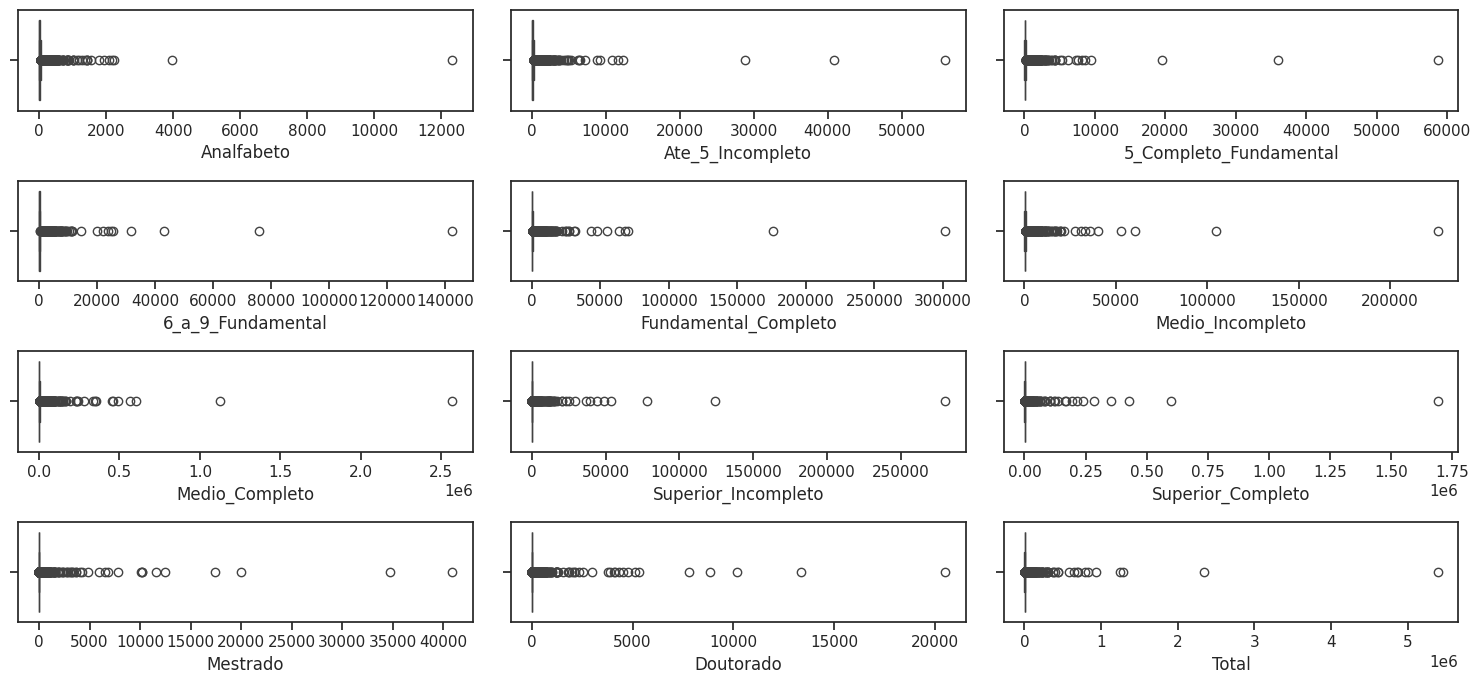

In [32]:
#@markdown Analyze outliers with a BoxPlot
numeric_features = list(df.keys())[2:]

fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(15, 7))
axs = axs.flatten()

for key, ax in zip(numeric_features, axs):
  sns.boxplot(df, x=key, ax=ax)

plt.tight_layout()
plt.show()

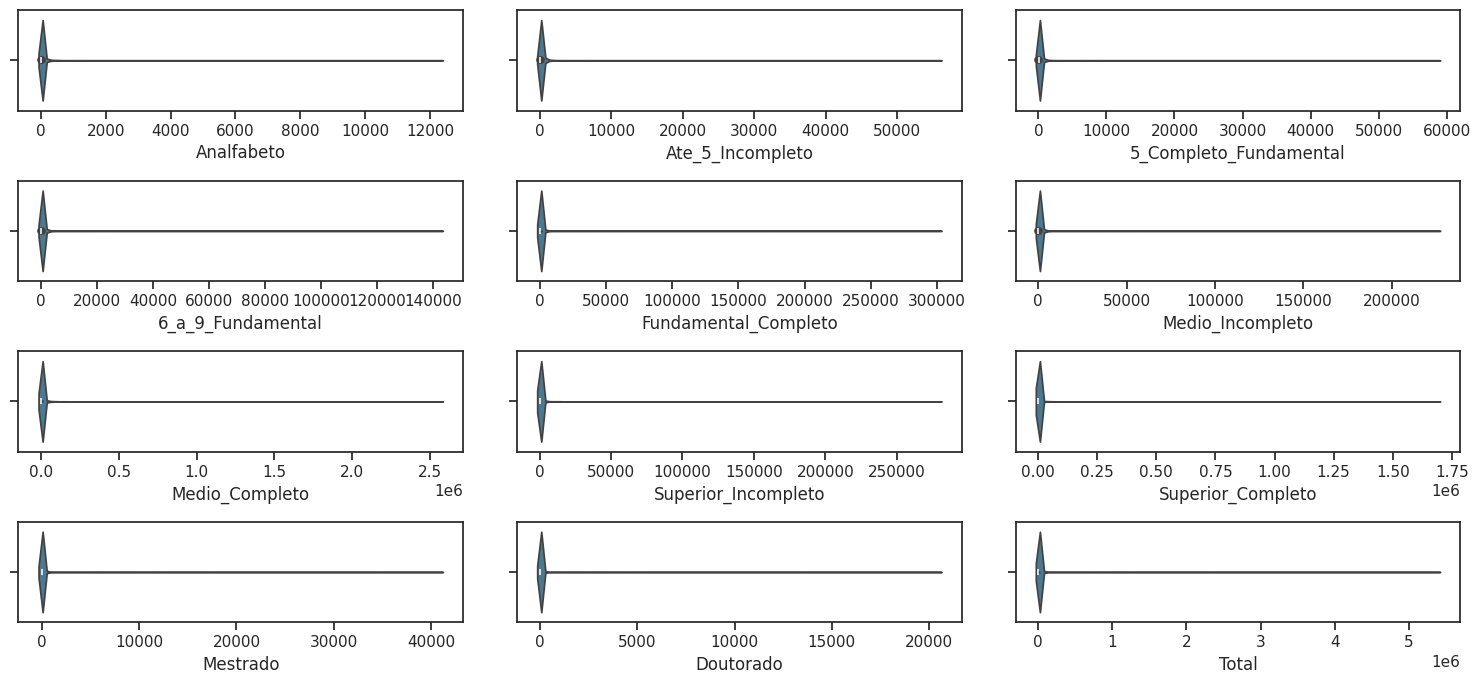

In [33]:
#@markdown Analize data distribution and outliers with a violin plot

fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(15, 7))
axs = axs.flatten()

for key, ax in zip(numeric_features, axs):
  sns.violinplot(df, x=key, ax=ax)

plt.tight_layout()
plt.show()

In [40]:
#@title ## Create new dataframe to analyze correlation beetwen features and population size
new_df = pd.merge(df, cities_df, on=['Estado', 'Municipio'])
new_df = new_df.drop(columns=['codigo', 'nome', 'latitude','longitude', 'tag',
                              'PIB per capita do municipio', 'PIB Serviços',
                              'PIB Industria', 'PIB Adminstração Publica',
                              'PIB Agropecuária', 'Nivel Sociocultural',
                              'Nivel Capacidades Institucionais', 'Nivel Meio Ambiente'])

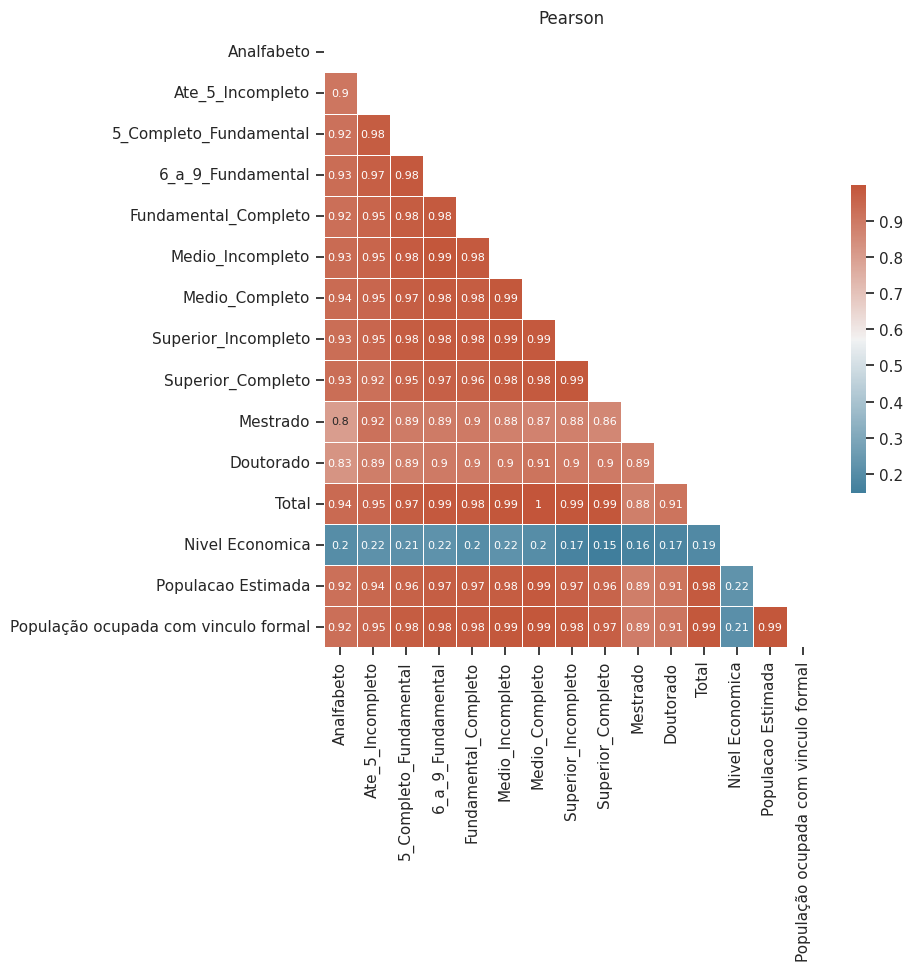

In [41]:
#@markdown Pearson Correlation

plt.figure(figsize=(8, 8))

corr_method = 'pearson'

corr = new_df.iloc[:, 2:].corr(method=corr_method)
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr,
            mask=mask,
            linewidths=.5,
            cbar_kws={"shrink": .5},
            cmap=cmap,
            annot=True,
            annot_kws={"size": 8})

plt.title(corr_method.capitalize())

plt.show()

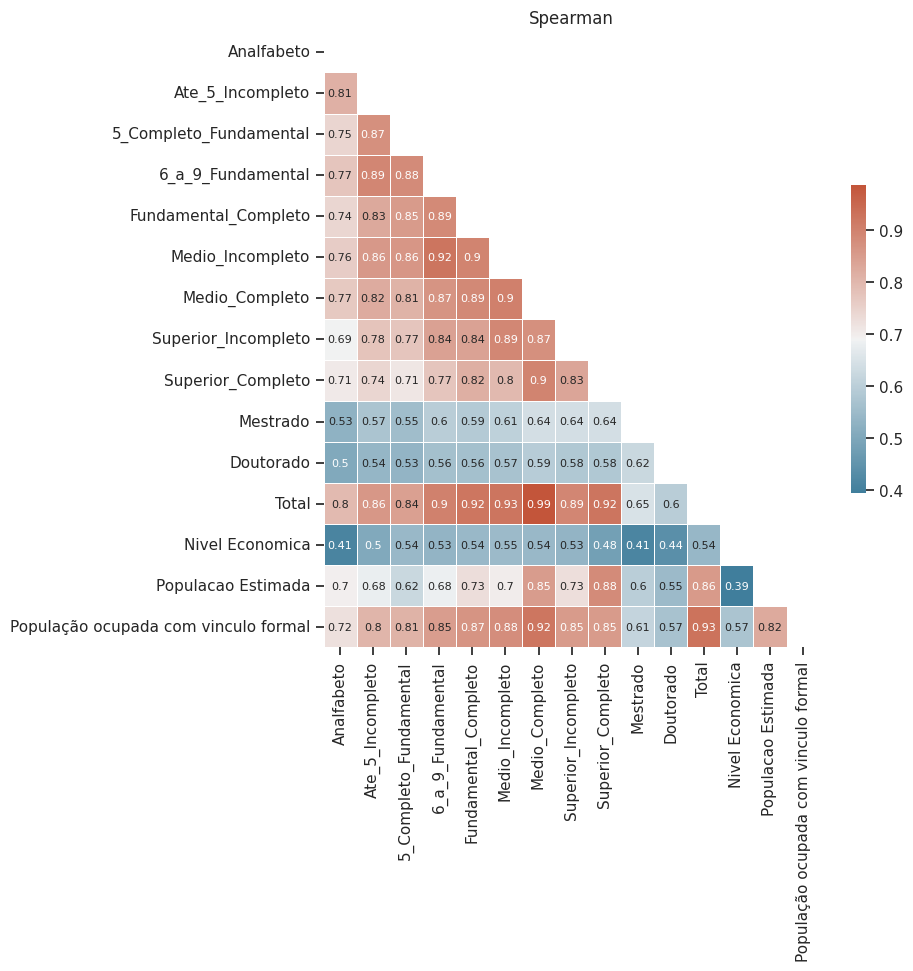

In [42]:
#@markdown Spearman Correlation

plt.figure(figsize=(8, 8))

corr_method = 'spearman'

corr = new_df.iloc[:, 2:].corr(method=corr_method)
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr,
            mask=mask,
            linewidths=.5,
            cbar_kws={"shrink": .5},
            cmap=cmap,
            annot=True,
            annot_kws={"size": 8})

plt.title(corr_method.capitalize())

plt.show()

In [43]:
#@title ## Create new dataset without outliers
def remove_outliers_iqr(df: pd.DataFrame):
    # Compute Quantilies
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)

    # Compute IQR
    IQR = Q3 - Q1

    # Define upper and lower limits
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Apply filter in dataset
    df_filtered = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

    return df_filtered

df_without_outliers = remove_outliers_iqr(df.iloc[:,2:])

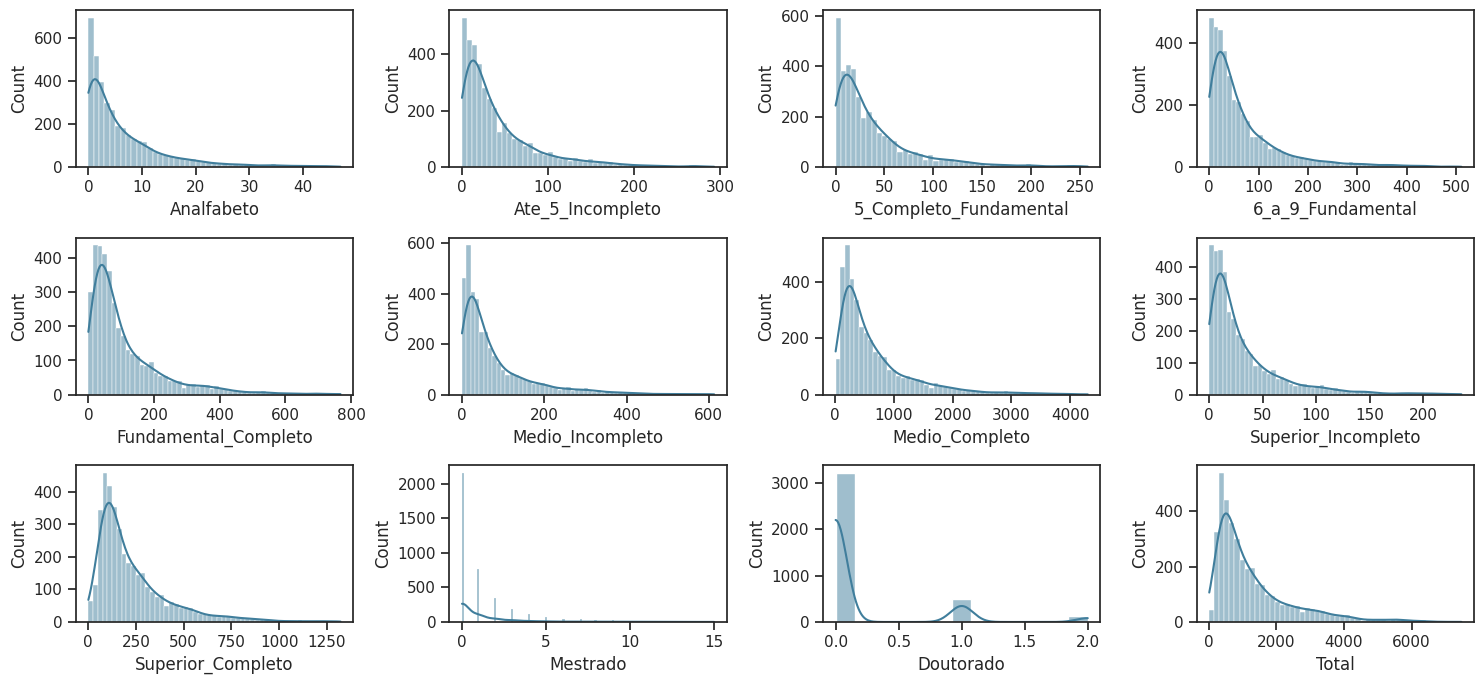

In [44]:
#@markdown Analyze the data distribution with a histogram plot
#@markdown - We can see distrubrion forms like Gamma distribution

fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(15, 7))
axs = axs.flatten()

for key, ax in zip(numeric_features, axs):
  sns.histplot(df_without_outliers, x=key, ax=ax, kde=True)

plt.tight_layout()
plt.show()